In [19]:
library(tidyverse)
library(ggplot2)
library(dplyr)

## Goals for EDA

In the process of completing this analysis I hope to be able to find pre-existing patterns in the data, visualize interesting relationships, and raise questions which will be answered by future analytic tabs. I am lucky that I already have a fair understanding of the values in the columns due to my experience with the database they are from as well as from knitting with many of these patterns. 

## Importing data and overview

The first step is to import the cleaned data from the previous data cleaning section. I will also be including the column names as a reminder for context.

In [20]:
pattern_df <- read.csv("../data/pattern_data_cleaned.csv")
pattern_df <- pattern_df[,-1]
colnames(pattern_df)

[1] "comments_count"            "currency"                 
 [3] "price"                     "currency_symbol"          
 [5] "free"                      "published"                
 [7] "difficulty_average"        "favorites_count"          
 [9] "projects_count"            "queued_projects_count"    
[11] "gauge"                     "gauge_divisor"            
[13] "gauge_pattern"             "row_gauge"                
[15] "id"                        "name"                     
[17] "permalink"                 "rating_average"           
[19] "rating_count"              "yardage"                  
[21] "yardage_max"               "yarn_weight_description"  
[23] "yarn_weight"               "needle_sizes_us"          
[25] "needle_sizes_metric"       "hook_size"                
[27] "needle_sizes_name"         "craft"                    
[29] "pattern_type"              "pattern_desc"             
[31] "category_permalink"        "category_parent_permalink"

#### Subgroups of Data

The data can be broken up into a few sections dependent on the variables themselves:

Popularity measures: this group includes the count of comments, favorites, projects, queued projects, and the ratings count and average. These measures will naturally be higher when a pattern was seen and used by more of the users of the site.  

Cost measures: this group includes the price, its currency, and whether or not the pattern is free in the first place. 

Pattern specific measures: this is a group consisting of many of the factors such as yardage, gauge, and needle or hook size which show for up on most pattern descriptions and give context for the user to prepare for the pattern.

Classifying factors: this includes the pattern type, craft, attributes, and category. These values give context about what the end goal of the pattern will be. This also includes name and id which act more as identifying information.

Misc factors: there are some variables remaining such as the text data and the difficulty which act as auxiliary to the data and will be considered if interesting.

#### Correlation
I would also like to do a quick correlation check on the variables I have. Unfortunately I have too many variables, so I was forced to narrow my selection down to seven of note.

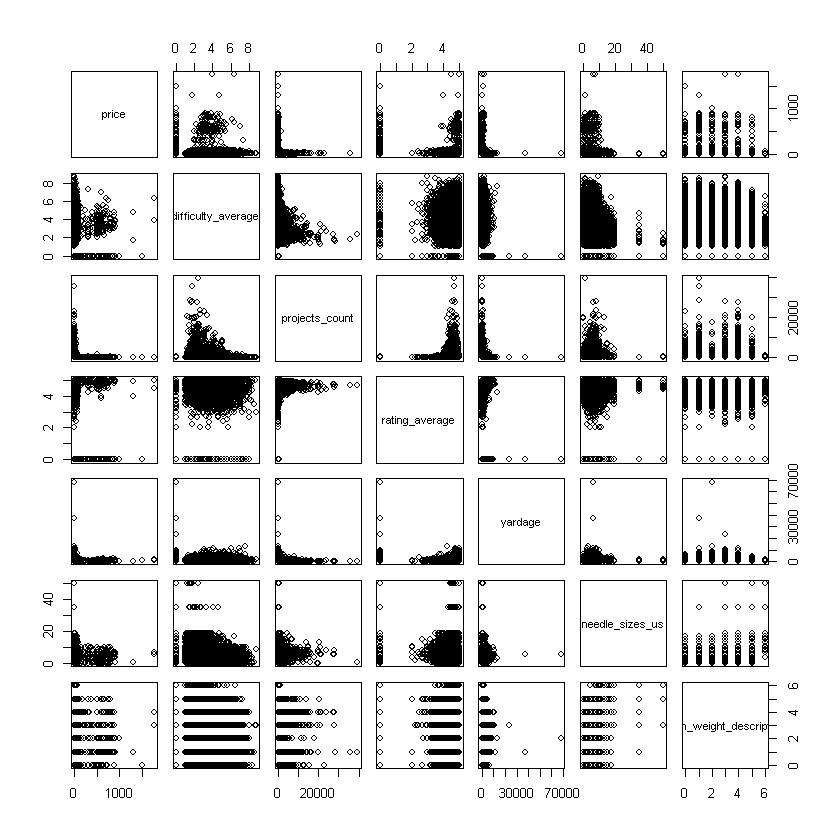

In [3]:
numeric_data <- select_if(pattern_df, is.numeric)

numeric_slice <- numeric_data %>% select(c(price, difficulty_average,projects_count,rating_average,yardage,needle_sizes_us,yarn_weight_description))
# data was too large so I'm taking a sample to visualize

pairs(numeric_slice)

#### Data Summaries

I'd also like to do a quick summary of all of the data available. It is dense in amount but gives a good overview that will start the rest of my analysis.

In [4]:
summary(pattern_df)

 comments_count      currency             price         currency_symbol   
 Min.   :  -2.00   Length:96537       Min.   :   0.00   Length:96537      
 1st Qu.:   0.00   Class :character   1st Qu.:   5.00   Class :character  
 Median :   2.00   Mode  :character   Median :   6.00   Mode  :character  
 Mean   :   6.73                      Mean   :  11.53                     
 3rd Qu.:   6.00                      3rd Qu.:   7.90                     
 Max.   :1509.00                      Max.   :1760.00                     
                                      NA's   :32599                       
    free          published         difficulty_average favorites_count
 Mode :logical   Length:96537       Min.   :0.000      Min.   :    0  
 FALSE:66294     Class :character   1st Qu.:0.000      1st Qu.:  138  
 TRUE :30242     Mode  :character   Median :2.300      Median :  443  
 NA's :1                            Mean   :2.056      Mean   : 1376  
                                    3rd Qu.:3

Now this is a lot of data. I'll highlight a few trends that will not be impressed upon later. First off, the majority of the patterns are not free, that's interesting to know as I only rarely ever pay for patterns. Someone also paid 1760 somethings for a pattern, I need to find the currency on that. I also need to find the pattern with the higher difficulty rating of 8.75. Some other fun facts are that some patterns are really popular with almost 100,000 interactions, there's patterns that require hundreds of thousands of yards of yarn, even up to a million, when 931 is the average, and that needles go to size 25 which is 25 milliliter needles (those are larger than your thumb).

#### Initial Data Visualizations

Next, I ran a series of visualizations for my own use on the distribution of the numeric patterns. I'll give a brief summary of what was found below and then go into more detail in the outlier section, providing more graphs and interpretations.

In [ ]:
numeric_data <- select_if(pattern_df, is.numeric)

for(i in 1:ncol(numeric_data)){
  plot <- ggplot(data = numeric_data, aes(x = numeric_data[,i])) +
    geom_density(fill = "#003DA5",color = "grey8") +
    xlab(colnames(numeric_data)[i]) +
    theme_classic()
  print(plot)
}

From this suite of visualizations I saw a lot of the individual variable behavior and some vaguely normal distributions, this could lean towards mean analysis or other determinations of distribution.

There are some common trends such as many 0 values and a more rounded distribution in the center or alternatively a large number at 0 and then a steep slope off with a long tail. The dataset contains many outliers as some patterns are incredibly popular, expensive, or require unique materials.

A few standouts are the difficulty and ratings average with a real distribution after a spike at 0, needle sizes with a spiky normal like distribution, and gauge with interesting constructions for all its variation.

Overall the distribution trends do not seem to be constant and there is much room to trim up outliers. After looking throught the categorical data that will be my next step. I do not go over these categories in the outlier section so I will leave the graphs here as a refernce point.

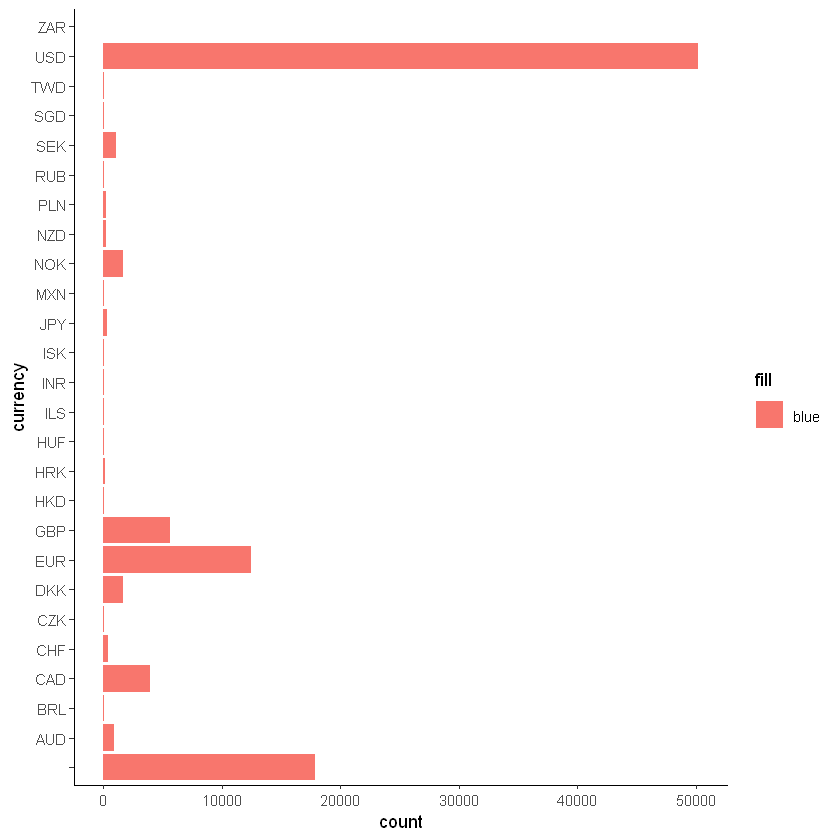

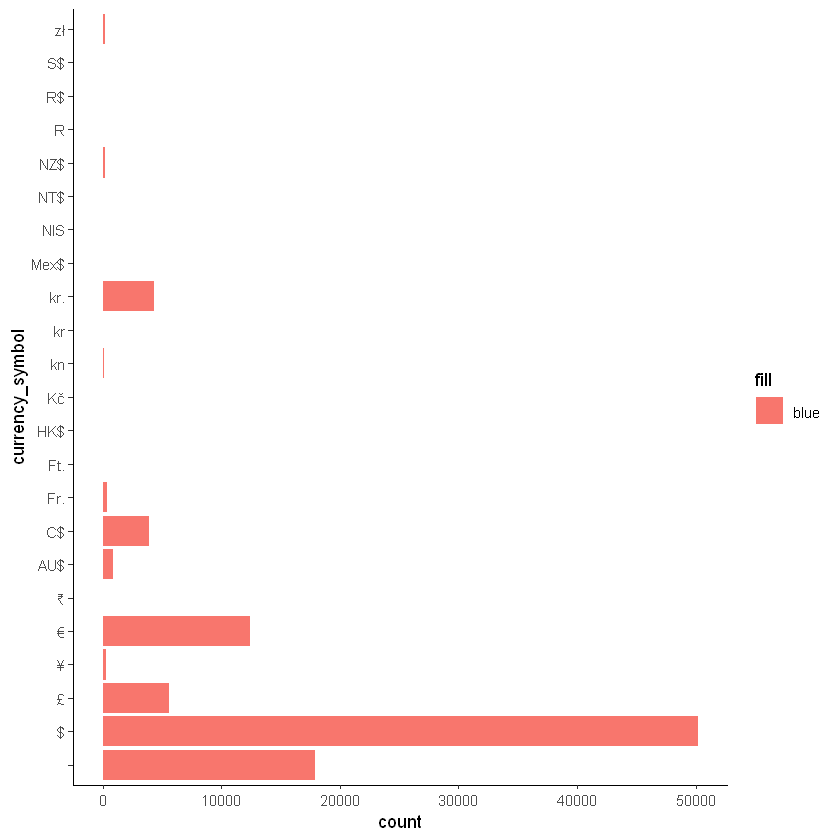

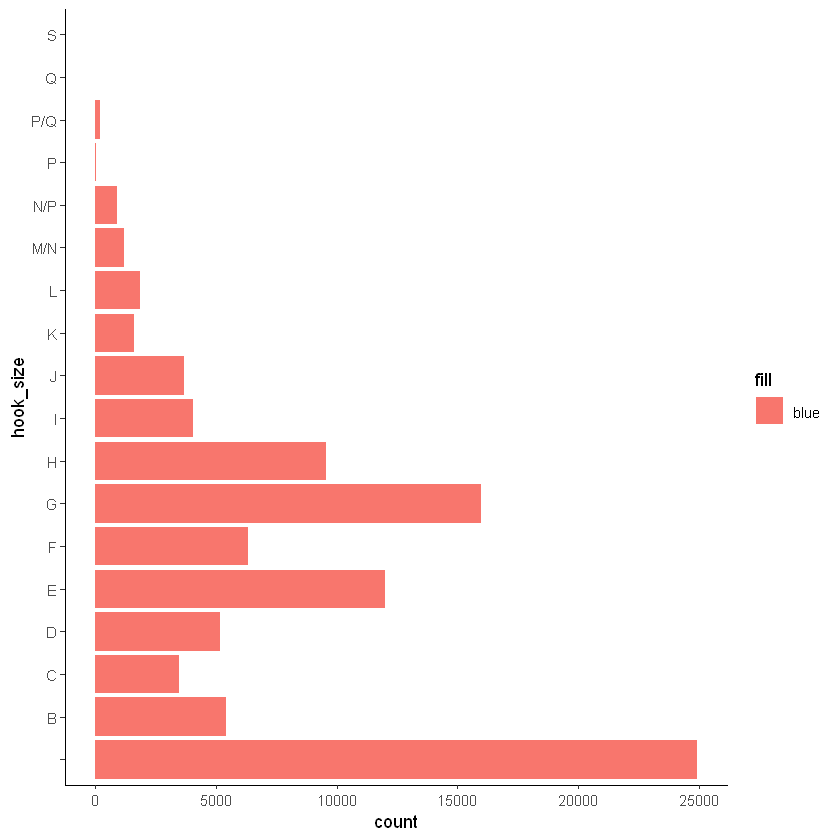

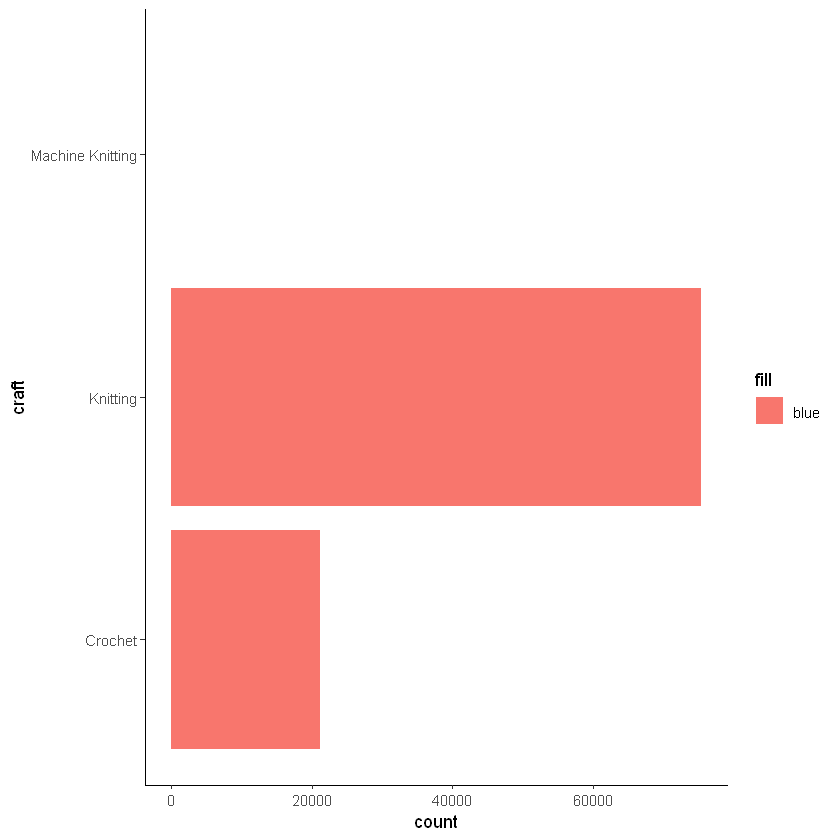

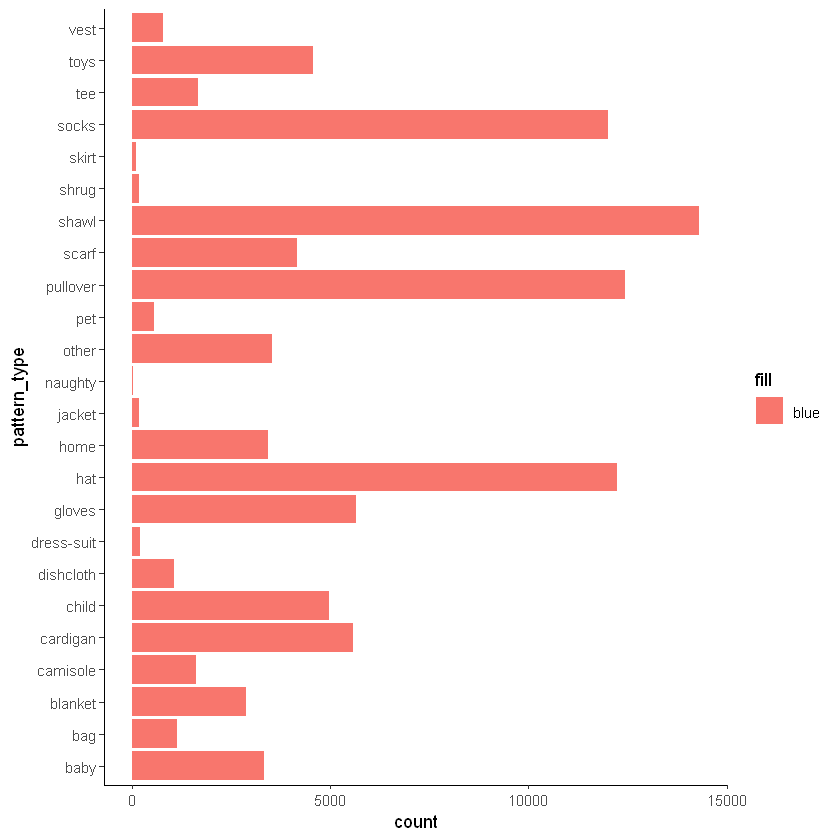

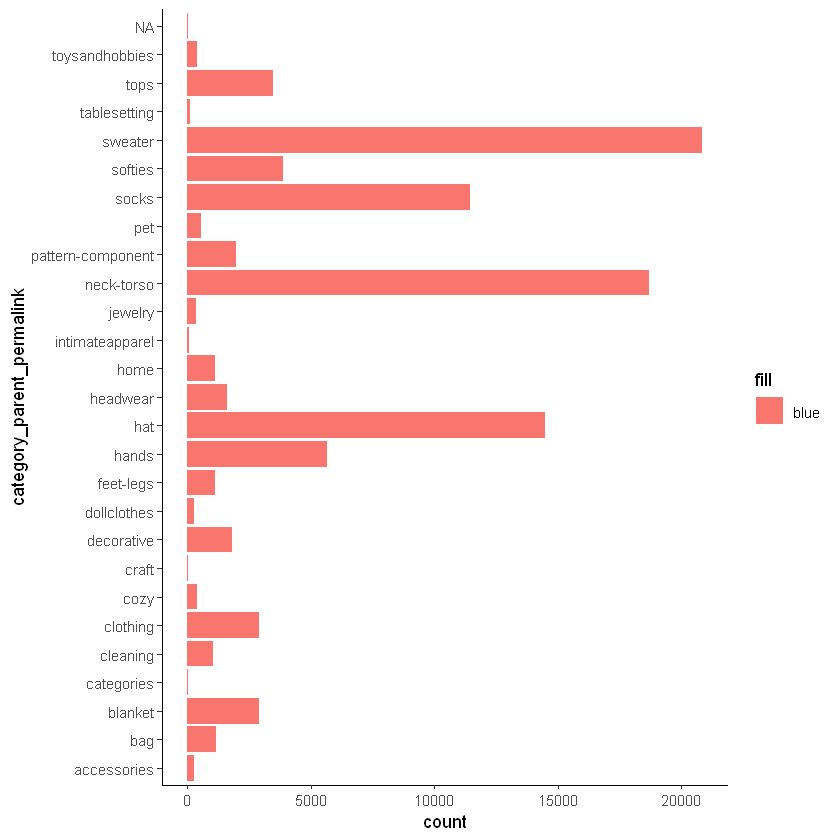

In [6]:
categorical_data <- select_if(pattern_df, is.character)
categorical_data <- categorical_data %>%
  select(-c(pattern_desc,published,gauge_pattern,name,permalink,category_permalink,needle_sizes_name))

for(i in 1:ncol(categorical_data)){
  plot <- ggplot(data = categorical_data, aes(y = categorical_data[,i], fill = "blue")) +
    geom_bar() +
    ylab(colnames(categorical_data)[i]) +
    theme_classic()
  print(plot)
}

On the categorical data side: american currency seems to be the leading one used on the site, G hook was the most used hook size while knitting was more popular as a craft, and shawl was the most popular type of pattern and sweater the most popular category. There was less outlier bias as more of the variables seemed filled in.

## Outlier Detection and Removal


In [7]:
## listing all numeric columns
colnames(numeric_data)
colnames(categorical_data)

[1] "comments_count"          "price"                  
 [3] "difficulty_average"      "favorites_count"        
 [5] "projects_count"          "queued_projects_count"  
 [7] "gauge"                   "gauge_divisor"          
 [9] "row_gauge"               "id"                     
[11] "rating_average"          "rating_count"           
[13] "yardage"                 "yardage_max"            
[15] "yarn_weight_description" "needle_sizes_us"        
[17] "needle_sizes_metric"

[1] "currency"                  "currency_symbol"          
[3] "hook_size"                 "craft"                    
[5] "pattern_type"              "category_parent_permalink"

#### Comments_count

The comments count has one notable outlier at 1509 comments with the next lowest pattern being at 619 comments. Fun bit of history here, this hat with all the comments is called the PussyHat project. It was knit by many for the women's march of 2016 in response to Donald Trump being elected. It’s one of the most well known symbols of the women's movement of that era with this being the place that most people seemed to have gotten the pattern from. I'm thinking I'll keep this data point around as a known outlier; the rest form a decent sloping distribution so I think I'm okay leaving this as it.

Also there are no missing values in these rows so I won't worry about that here.


In [5]:
## Highest comment values
check <- pattern_df$comments_count %>% table() %>% as.data.frame() 
check[order(check$.),] %>% tail(n = 10)

## the pussy hat project
pattern_df %>% 
  filter(comments_count == 1509) %>% 
  select(comments_count,name,rating_average, projects_count,favorites_count)

pattern_df <- pattern_df %>% filter(comments_count >= 0) 

.    Freq
248 387  1   
249 400  1   
250 406  1   
251 422  1   
252 442  1   
253 480  1   
254 531  1   
255 554  1   
256 619  1   
257 1509 1

comments_count name             rating_average projects_count favorites_count
1 1509           PussyHat Project 4.63281        12925          13951

#### Price

For price there are some high values I may trim off as well as missing values that could easily be replaced with 0. On that latter point, if a value is missing then it most likely means the pattern is free and thus could be seen to cost 0 dollars. 

I also run into an issue here that patterns are listed in different currencies so thousands of Yuen for instance could represent a much smaller actual amount, I'll see if there are any trends related to this.

In [6]:
## relating price to currency
price_model <- lm(data = pattern_df, price ~ currency)
summary(price_model)

##
pattern_df$price %>% table() %>% tail()

pattern_df %>% filter(price == 1760|
                        price == 1500|
                        price == 1300|
                        price == 1296|
                        price == 1000) %>%
                    select(price,name,rating_average)

## setting NAs to 0
pattern_df[is.na(pattern_df$price),3] <- 0


Call:
lm(formula = price ~ currency, data = pattern_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-433.33   -1.15   -0.10    1.12 1161.71 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.5715     2.3235   3.259  0.00112 ** 
currencyAUD    0.1687     2.3689   0.071  0.94323    
currencyBRL   24.5603     3.6738   6.685 2.32e-11 ***
currencyCAD   -0.3000     2.3335  -0.129  0.89772    
currencyCHF   -1.6255     2.4274  -0.670  0.50307    
currencyCZK  123.4285     4.8181  25.618  < 2e-16 ***
currencyDKK   38.4054     2.3472  16.362  < 2e-16 ***
currencyEUR   -1.7659     2.3266  -0.759  0.44786    
currencyGBP   -2.6926     2.3306  -1.155  0.24798    
currencyHKD   48.6285     5.0193   9.688  < 2e-16 ***
currencyHRK    0.4185    13.5482   0.031  0.97536    
currencyHUF 1025.7618     8.0488 127.442  < 2e-16 ***
currencyILS   19.1208     4.3707   4.375 1.22e-05 ***
currencyINR  262.4785     6.4054  40.977  < 2e-16 ***
currencyJPY  590.7226   

.
 900 1000 1296 1300 1500 1760 
   4    1    1    1    1    2 

price name                      rating_average
1 1300  Very Berry Garden         4.913043      
2 1760  SWEATER                   4.500000      
3 1000  Szatyor csúszda           0.000000      
4 1760  Road vest                 5.000000      
5 1296  Spiral Socks No.21 ひし形 4.000000      
6 1500  Drazsé                    0.000000

The model says there is difference by price. I'll take this as a chance to source some currency conversion rates and try to get all of the prices in standard US dollars.

In [21]:
transition <- read.csv("../data/currency_transition.csv", header = FALSE)
exchange_rates <- read.csv("../data/Currency_rate_11 10 2023.csv")

#head(transition)
#head(exchange_rates)

colnames(transition) <- c("country","name","currency","something_idk")
colnames(exchange_rates) <- c("name","dollar_to","dollar_from")
#dim(transition)
#dim(exchange_rates)

exchange <- left_join(x=transition,y=exchange_rates) %>% select(c(name,currency,dollar_from))

filtered_exchange <- exchange %>% filter(currency %in% pattern_df$currency)

#head(filtered_exchange)

distinct_exchange <- filtered_exchange %>% select(currency, dollar_from) %>% distinct()

distinct_exchange <- distinct_exchange[-8,]
#head(distinct_exchange)

distinct_exchange[is.na(distinct_exchange$dollar_from) == TRUE,2] <- 1

price_attempt <- pattern_df %>% select(c(price,currency,name))
interstice <- left_join(price_attempt,distinct_exchange)

interstice <- interstice %>% mutate(price_adjusted = price * dollar_from)

Joining with `by = join_by(name)`
Joining with `by = join_by(currency)`


After merging together all the relevant information, there is a decent estimate on price of everything in dollars.

price currency name                           dollar_from price_adjusted
58224 100   USD      Blooming Hydrangea Shawl       1.000000    100.0000      
72642 100   USD      Seasonal Sock Club             1.000000    100.0000      
14183 213   EUR      Hálfmáni                       1.067657    227.4109      
26583 213   EUR      Hlýir                          1.067657    227.4109      
55605 213   EUR      Kraginn                        1.067657    227.4109      
48452 216   EUR      Vífilsfell                     1.067657    230.6139      
85632 220   EUR      Combinaison à torsades - M2838 1.067657    234.8845      
85633 220   EUR      Pull lion - M2858              1.067657    234.8845      
41918 295   GBP      Maud                           1.221520    360.3484      
90884 295   GBP      Winter Warmers                 1.221520    360.3484

Warning message:
"Removed 32600 rows containing non-finite values (`stat_density()`)."


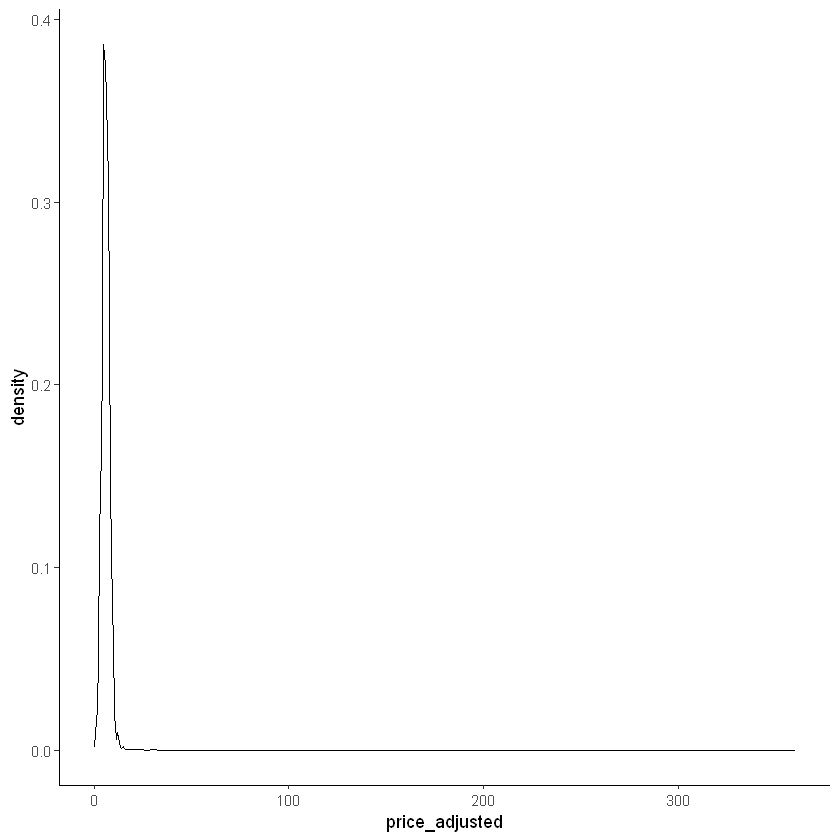

In [24]:
interstice_na <- interstice %>% na.omit()
interstice_na[order(interstice_na$price_adjusted),] %>% tail(10)

ggplot(data = interstice,aes(x = price_adjusted)) + geom_density() + theme_classic()

So cannonically, the most expensive garments on the platform, in order, are from an Icelandic producer named Helene Magnanimous, a brand named Bergere de france, and, the queen of them all, a british designer Susan Crawford who priced a the pattern for a pair of mittens at OVER 300 DOLLARS!

Anyway, the price being adjusted by currency actually gives a more standard measure which I will be adding to the overall data. Also below the three I mentioned earlier it's just one off expensive patterns from random designers, not the top three like were listed above. The majority of patterns were between 0 and 20 with only 84 patterns being more expensive than that.

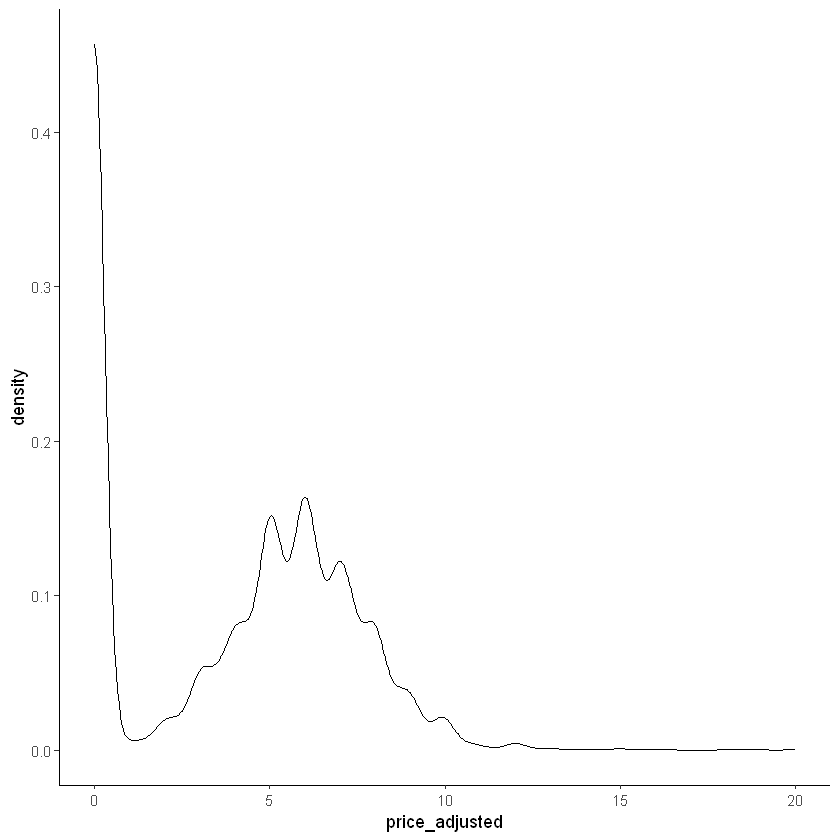

In [9]:
pattern_df$price_adjusted <- interstice$price_adjusted
pattern_df <- pattern_df %>% filter(price_adjusted <= 20)

ggplot(data = pattern_df,aes(x = price_adjusted)) + geom_density() +
  theme_classic()

#### Difficulty_average

I don't foresee there being an issue with this value, it seems to be well bound with an interesting distribution aside from all the 0s. This value needs to be assigned by users so if no one is using the pattern it won't arise.

#### Favorites_count

Favorites count is similar to comments count with mostly low data but some outliers, similarly too there are no missing values as the database assigns the value.

In [10]:
## Highest favorites count
check <- pattern_df$favorites_count %>% table() %>% as.data.frame() 
top_10 <- check[order(check$.),] %>% tail(n = 10)

as.numeric(as.character((top_10[,1])))

## checking names 
top_favorites <- pattern_df %>% 
  filter(favorites_count %in% as.numeric(as.character((top_10[,1])))) %>%
  select(name, favorites_count)

top_favorites[order(top_favorites$favorites_count,decreasing = TRUE),]

[1] 70254 71844 71864 76446 77553 81286 82482 82562 87956 92747

name                                favorites_count
3  No Frills Sweater                   92747          
2  The Weekender                       87956          
8  Reyna                               82562          
4  Ranunculus                          82482          
6  Hermione's Everyday Socks           81286          
5  Nightshift                          77553          
1  Flax                                76446          
10 Honey Cowl                          71864          
7  Baa-ble Hat                         71844          
9  The Age of Brass and Steam Kerchief 70254

Hmmm, so the patterns that come out of this are actually really cool and well made so I'm inclined to keep them, especially as there isn't one or a few that are much larger. Mainly the distribution seems to have a long tail rather than there being specific outliers. The top pattern is also just a simple sweater which is interesting.

I'm actually going to keep track of this list for my personal use as others seems to like these patterns as well.

#### Projects_count and Queued_projects_count

So these two values are similar and I'm interested to find out which is larger on average and to understand some differences and extremes.

In [25]:
#Highest project count
check <- pattern_df$projects_count %>% table() %>% as.data.frame() 
top_10 <- check[order(check$.),] %>% tail(n = 10)

top_projects <- pattern_df %>% 
  filter(projects_count %in% as.numeric(as.character((top_10[,1])))) %>%
  select(name, projects_count)
top_projects[order(top_projects$projects_count,decreasing = TRUE),]

# Highest queued project count
check <- pattern_df$queued_projects_count %>% table() %>% as.data.frame() 
top_10 <- check[order(check$.),] %>% tail(n = 10)

top_queued_projects <- pattern_df %>% 
  filter(queued_projects_count %in% as.numeric(as.character((top_10[,1])))) %>%
  select(name, queued_projects_count)
top_queued_projects[order(top_queued_projects$queued_projects_count,decreasing = TRUE),]

print("Mean project count")
mean(pattern_df$projects_count)
print("mean queued project count")
mean(pattern_df$queued_projects_count)

name                      projects_count
3  Hermione's Everyday Socks 39438         
7  Hitchhiker                35602         
4  Sockhead Slouch Hat       28540         
6  Honey Cowl                27999         
5  Barley                    27621         
1  Flax                      27442         
9  Clapotis                  23663         
8  Monkey Socks              23117         
10 Fetching                  21357         
2  Ranunculus                20950

name                       queued_projects_count
6  Honey Cowl                 13874                
8  GAP-tastic Cowl            13570                
4  Hermione's Everyday Socks  13359                
9  Star Crossed Slouchy Beret 12973                
2  The Weekender              12443                
5  Reyna                      12360                
10 February Lady Sweater      11449                
7  owls                       11385                
3  Ranunculus                 11376                
1  Flax                       11367

[1] "Mean project count"


[1] 120.7909

[1] "mean queued project count"


[1] 167.6991

Again these are interesting results, no na values, and there are some familiar patterns to look at. I'm most interested to see Ranunculus showing up once or twice. Similarly, it seems that the projects count has a lower average but higher extremes than the queued projects. This suggests more people have done specific patterns but as a whole people are waiting to do more projects than they have completed. Knowing knitting people, this makes sense.

Warning message:
"Removed 8652 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 14643 rows containing non-finite values (`stat_density()`)."


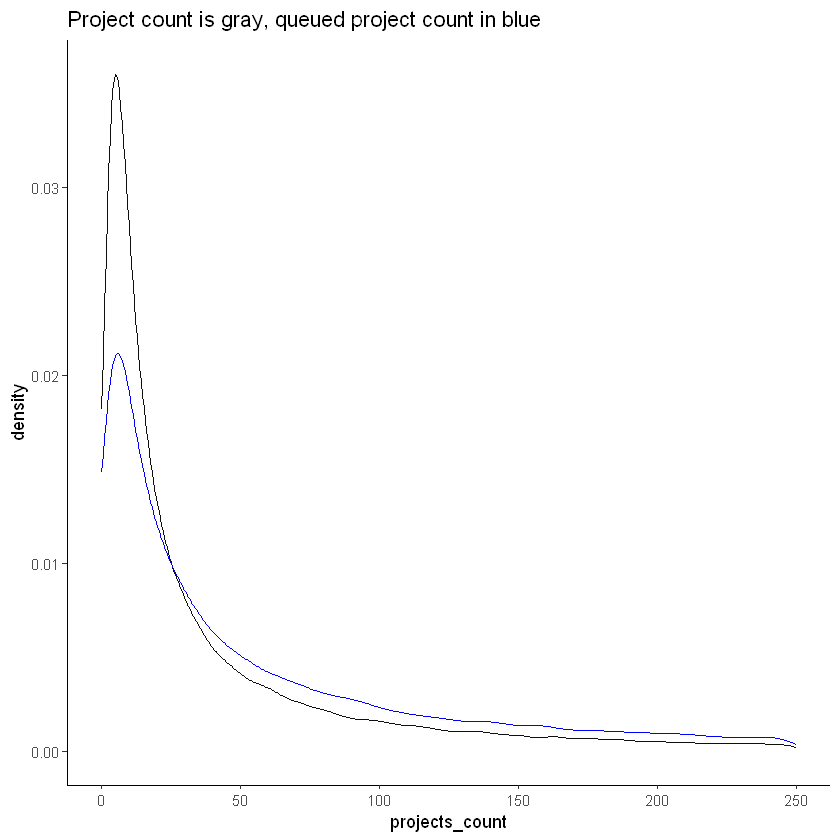

In [27]:
ggplot(data = pattern_df) + 
  geom_density(aes(x = projects_count), color = "grey6") + 
  geom_density(aes(x = queued_projects_count),color = "blue") +
  xlim(0,250) +
  theme_classic()+
  labs(title = "Project count is gray, queued project count in blue")


This graph of the data shows the effect on the other side of the equation with similarly more patterns with a higher project count to start and the queued projects being slightly more as the numbers increase.

With these values and the ratings average and count later on I'm thinking of putting together a popularity metric and comparing it to the Ravelry specific one. Speaking of which, I'll jump ahead and look at ratings.

#### Rating_average and Rating_count

Ratings in the database are scores that the users have given the patterns they like or dislike. The average is heavily skewed by the number of people rating it so there are many patterns with 5 star ratings from only a handful of people but some with mid 4.5s and thousands. Finding which pattern is rated the highest would require some thresholding which I may enter into later. Mostly at this point I want to do a quick test of which values have been rated the most and replace the NA's in rating count with 0s for future use.

Warning message:
"Removed 32112 rows containing non-finite values (`stat_density()`)."


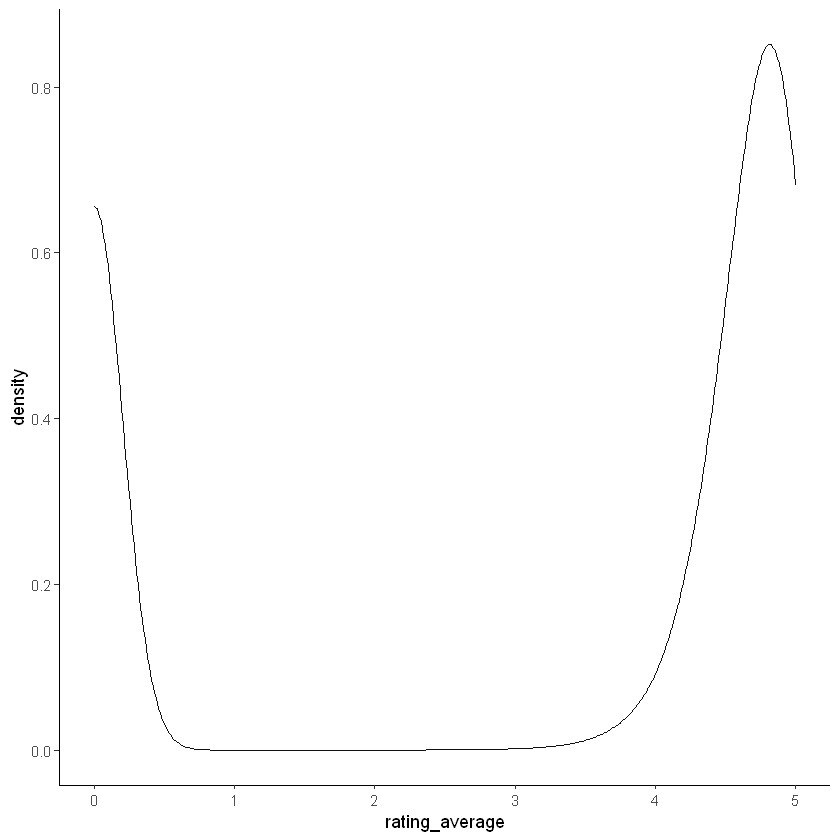

name                                 rating_average rating_count
96235 188-37 Opaline                       5               3          
96246 Banna Shawl                          5               4          
96255 Majestic Shawl                       5              22          
96272 Jean Marie                           5               4          
96274 186-19 Aretusa                       5               3          
96283 Forest Nymph                         5              19          
96288 Super Simple Bulky Brioche Crossover 5               9          
96302 Wastelandic                          5               5          
96307 Alnwick Shawl                        5               6          
96309 Headless Roses                       5              10

name                      rating_average rating_count
1466 GAP-tastic Cowl           4.550026       5807        
301  Barley                    4.744859       6079        
75   Flax                      4.758879       6138        
4255 Calorimetry               4.229793       6619        
449  Honey Cowl                4.554268       7592        
6658 Fetching                  4.335002       7791        
1451 Monkey Socks              4.563994       8032        
5649 Clapotis                  4.434231       8507        
152  Hermione's Everyday Socks 4.658873       9067        
606  Hitchhiker                4.678016       9516

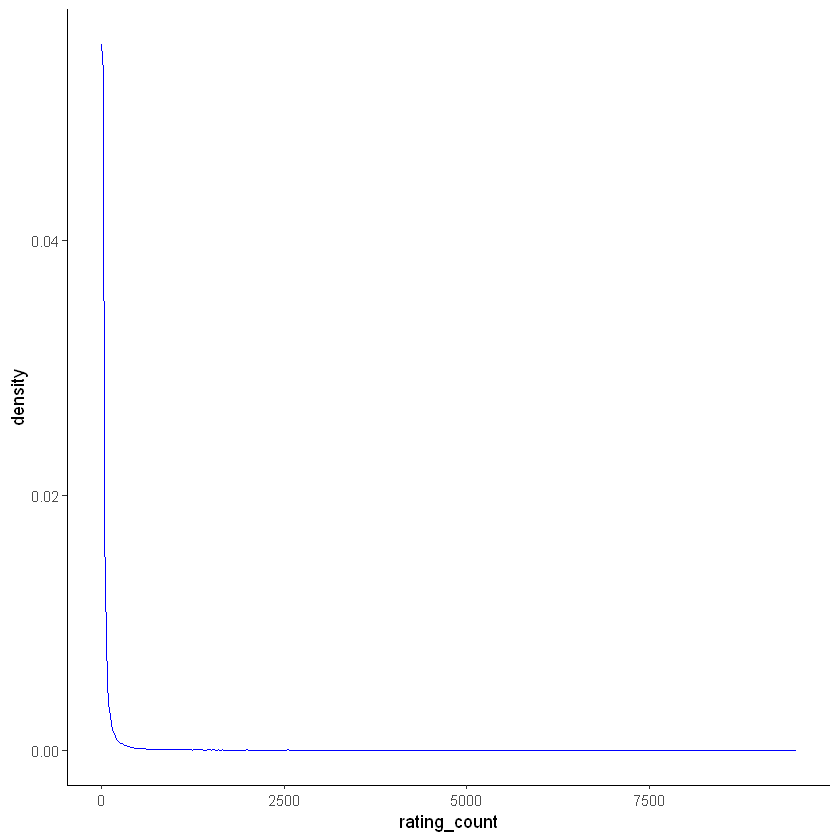

In [13]:
ggplot(data = pattern_df) + 
  geom_density(aes(x = rating_average), color = "grey6") + 
  theme_classic()

ggplot(data = pattern_df) +
  geom_density(aes(x = rating_count),color = "blue") +
  theme_classic()

pattern_df[is.na(pattern_df$rating_count),'rating_count'] <- 0

## Many patterns with a perfect 5
pattern_df[order(pattern_df$rating_average),]%>% select(c(name,rating_average,rating_count)) %>% tail(n = 10)

## most rated patterns are around 4.5
pattern_df[order(pattern_df$rating_count),]%>% select(c(name,rating_average,rating_count)) %>% tail(n = 10)

In a way that makes sense, the rating average is a value with high points at zero where patterns haven't been rated or at a peak of roughly 4.5 before falling a bit to 5. This checks out as most ratings on the site are good or people wouldn't bother, but there are also many unscored patterns. The count reflects this too with most patterns having zero but a long tail for some popular patterns which are listed as well.

#### Gauge, Gauge divisor, and Row gauge

Gauge is a value used to estimate dimensions based on the number of stitches that make up a 4x4 square. I'll go into more detail after showing the distribution of the data.

In [14]:
check <- pattern_df$gauge %>% table() %>% as.data.frame() 
top_10 <- check[order(check$Freq),] %>% tail(n = 10)
top_10
length(na.omit(pattern_df$gauge))

check <- pattern_df$gauge_divisor %>% table() %>% as.data.frame() 
top_10 <- check[order(check$Freq),] %>% tail(n = 10)
top_10
pattern_df[is.na(pattern_df$rating_count),'gauge_divisor'] <- 4

check <- pattern_df$row_gauge %>% table() %>% as.data.frame() 
top_10 <- check[order(check$Freq),] %>% tail(n = 10)
top_10
length(na.omit(pattern_df$row_gauge))

.  Freq
184 28 2614
175 26 2747
123 17 2823
145 21 3355
195 32 3387
116 16 4305
128 18 5649
163 24 5694
152 22 6860
139 20 7641

[1] 80412

. Freq 
2 2  3407
1 1  6131
3 4 83978

.  Freq
109 22 2122
101 20 2134
163 40 2592
148 34 2690
120 26 3166
154 36 3173
115 24 4142
139 30 4559
144 32 5069
128 28 5908

[1] 70484

Gauge: this represents the number of stitches it takes to get a certain amount of inches, this amount of inches is usually 4 but is represented in the gauge divisor column of the data. There are a lot of missing values but as this is one of the main determining variables for the pattern I don't think subbing in values will be feasible. I'll just leave the empty values as is. 

Gauge divisor: there were quite a few missing values but it was easier to replace these as the vast majority of the divisors were 4, so I just input 4 for the missing values. The value itself represents how many inches the gauge's amount of stitches covers.

Row Gauge: there are far fewer row gauge values listed which may be a limiting factor. Row gauge is similarly important to gauge itself, which tends to cover stitches rather than rows, but it has yet to be seen whether the combination of the two is a more powerful predictor than the thing itself. Similarly I don't think these values can be filled in so I will leave them empty for now.

#### Yardage and Yardage_max

Okay, so there is going to be a lot of work done on this value. Some people went absolutely crazy on the amount of yarn possible for a pattern with the difference between the max yardage and the yardage being at least a hundred thousand, there will be a lot of trimming here.

When looking up values you get patterns like the captain america pillow with yardage listed from 1 to 1,000,000 which is utterly facetious. I'm going to do a few steps to reduce this. My first step will be culling patterns with wild numbers of yardage and max yardage. My follow up will be to set patterns with a NA amount of max yardage to the yardage of the rest of the pattern or vice versa. It is common to see patterns where it requires a set amount of yarn and there is no pattern sizing with maximum or minimum yardage.

In [ ]:
## trial and error to find cut off point
pattern_df %>% filter(is.na(yardage_max)== FALSE) %>% nrow()
pattern_df %>% filter(yardage_max < 5000) %>% nrow()
## I settled at around 5000 as it only removed 400 or so patterns
## and its high enough that true high bounds won't get caught

# implementing amount
pattern_df$yardage_max[pattern_df$yardage_max > 5000] <- NA 

## now to do the same for yardage, then we'll equate the two

pattern_df %>% filter(is.na(yardage)== FALSE) %>% nrow()
pattern_df %>% filter(yardage < 4000) %>% nrow()

## again settling around 4000 due to it taking only 200 or so patterns off
## and being low enough to remove crazy value, I will replace these values with NA just to be sure

pattern_df$yardage[pattern_df$yardage > 4000] <- NA 

## now to set yardage_max to yardage when yardage_max is NA

## I do regrettably believe this is a for loop moment

pattern_df2 <- pattern_df

for(i in 1:nrow(pattern_df2)){
  if(is.na(pattern_df2[i,21])==TRUE){
    pattern_df2[i,21] <- pattern_df2[i,20]
  }
}

## now these two values should be equal
pattern_df2 %>% filter(is.na(yardage_max)== FALSE) %>% nrow()
pattern_df2 %>% filter(is.na(yardage)== FALSE) %>% nrow()

## it seems that the yardage_max is actually a bit bigger so I'm going to do the same thing in reverse to even them out

for(i in 1:nrow(pattern_df2)){
  if(is.na(pattern_df2[i,20])==TRUE){
    pattern_df2[i,20] <- pattern_df2[i,21]
  }
}

pattern_df2 %>% filter(is.na(yardage_max)== FALSE) %>% nrow()
pattern_df2 %>% filter(is.na(yardage)== FALSE) %>% nrow()

# Now we are even

pattern_df <- pattern_df2

So in total I have decreased the rows by about 500 to get rid of really wacky outliers and set values equal to their opposite when there were missing values. There are still around 10,000 patterns in the database without yardage but this is an affordable loss.

#### Yarn_weight_description

Yarn weight description was already formalized in the data cleaning tab. 

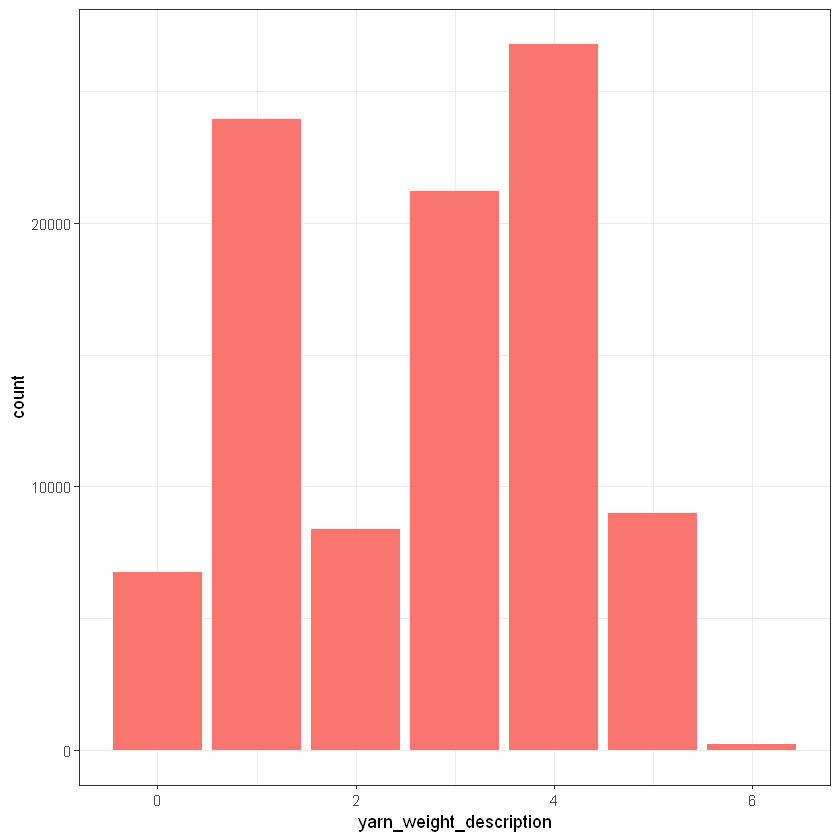

In [19]:
ggplot(data = pattern_df, aes(x = yarn_weight_description,fill = "red")) + geom_bar() + theme_bw() +
  theme(legend.position = "none")

So it is interesting that weight 4 or worsted/aran weight is the most popular. This isn't the largest size but its popular cause you can make nice looking stitching without too much effort. It normally takes size 8-10 needles (american).

#### Needle Sizes Metric and US

Warning message:
"Removed 12844 rows containing non-finite values (`stat_density()`)."


[1] 83465

[1] 0

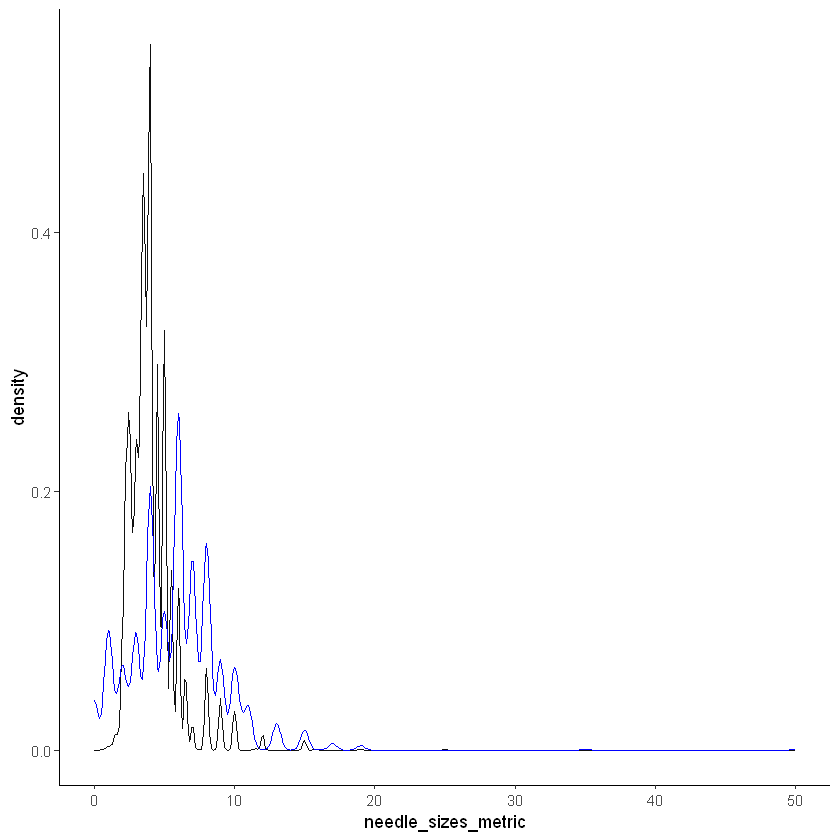

In [17]:
ggplot(data = pattern_df) + 
  geom_density(aes(x = needle_sizes_metric), color = "grey6") + 
  geom_density(aes(x = needle_sizes_us),color = "blue") +
  theme_classic()

pattern_df$needle_sizes_us %>% na.omit() %>% length()
pattern_df$needle_size_metric %>% na.omit() %>% length()

In terms of missing values, there are more missing values for the US sizes than the metric. This is essentially a unit difference though so we can simply get around it by only using the metric values for analysis.

As expected, metric needle sizes, which only go to 25, peak a lot sooner than the US ones which go to 50. The averages do overlap a little with a large tail going to the right up to the max value. A density plot doesn't fully capture the discrete nature of the data as sizes are fixed, but I do believe it depicts the distribution better than a bar chart would.

## Updating Saved Data

Having trimmed and worked on the outliers, I will be resaving the data for future use:

In [18]:
write.csv(pattern_df,"../data/pattern_data_updated.csv")

## Connections and Hypothesis

I will assert that there is a relationship between the yardage, needle size, and gauge which reflects onto the pattern type and that price and yardage are also linked. There may also be a relationship there with difficulty as well and I additionally hope to visualize the text data some. I'm interested to see if this and other connections hold true on visualization: 

#### Viz 1

Warning message:
"Removed 23881 rows containing missing values (`geom_point()`)."


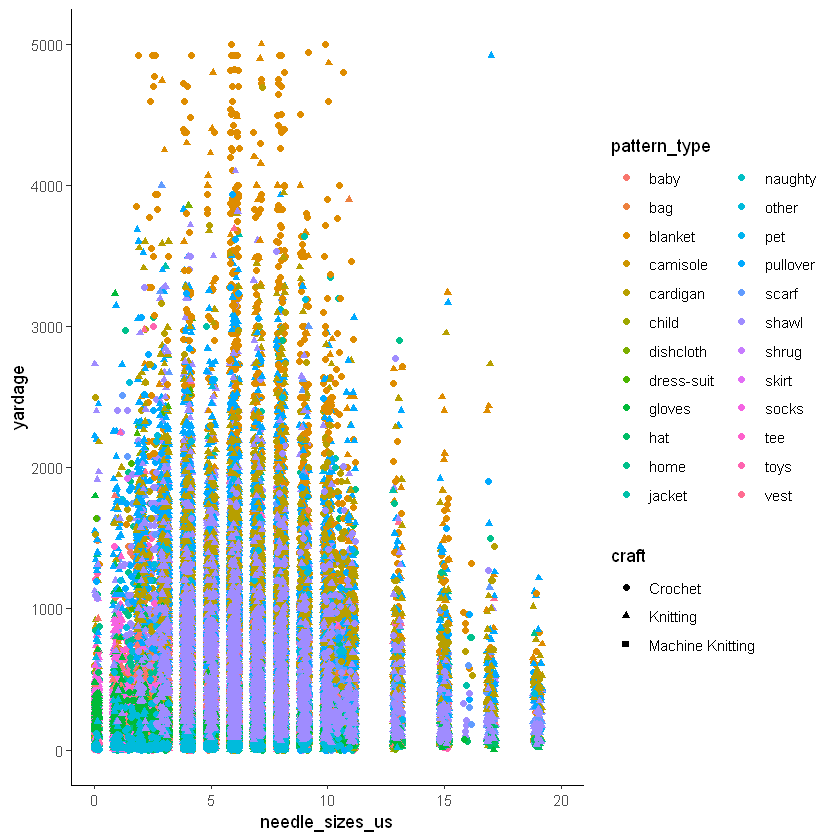

In [22]:
ggplot(pattern_df,aes(y = yardage,x = needle_sizes_us,color = pattern_type,shape = craft), alpha = .3) + geom_jitter() +
  theme_classic() + ylim(0,5000) +xlim(0,20)

There does seem to be some rudimentary distribution with middle sized needles using more yarn, but it's overall clouded by the density of the data present. It would be possible to graph a sample and check distribution there or clump together types of patterns into samples representative of the projects, although that would be more based on a future clustering analysis or my own knowledge of patterns. However it is clear that the yardage lowers at higher needle sizes, as expected, and most types of pattern are well represented at all needle sizes.

#### Viz 2

I have been wondering whether there is any relation of price to complexity or of the amount of yarn needed, assuming that a more complicated pattern to create would reflect more work and thus more compensation. Let's see.


Warning message:
"Removed 41119 rows containing missing values (`geom_point()`)."


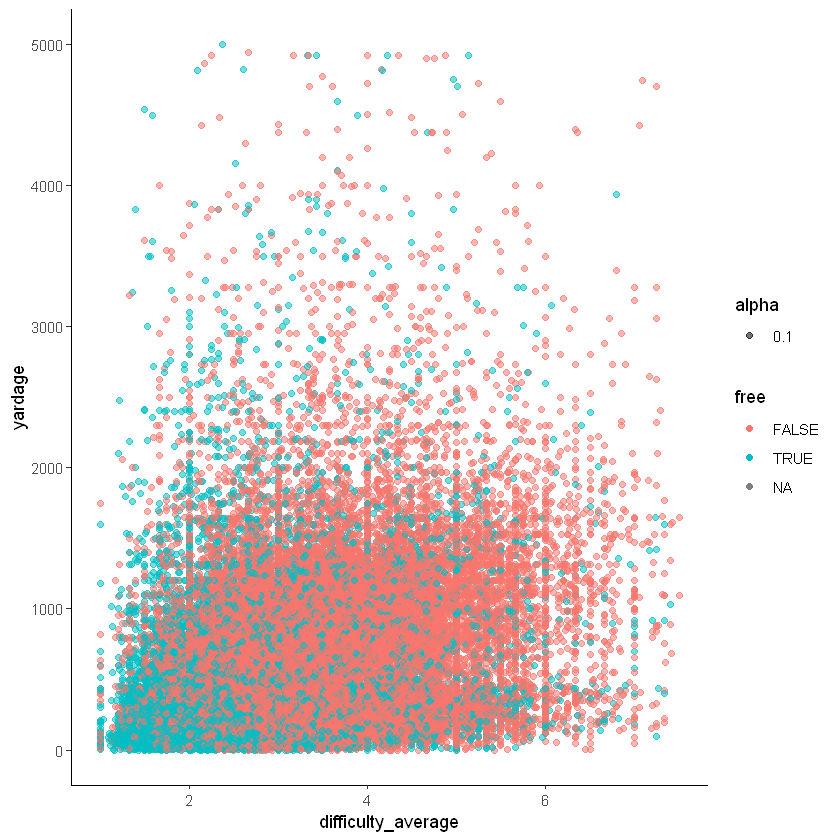

In [23]:
ggplot(pattern_df,aes(x = difficulty_average,y = yardage,color = free,alpha = .1)) + geom_jitter() + theme_classic() + ylim(0,5000) + xlim(1,7.5)

Alright, there is a clear relationship that the more difficult a pattern is the more likely it is to be paid for, this could be a self fulfilling prophecy though as if someone pays for a pattern they will be more willing to rate its difficulty. I'll do a follow up visualization without the difficulty and just free and yardage:

Warning message:
"Removed 26367 rows containing non-finite values (`stat_boxplot()`)."


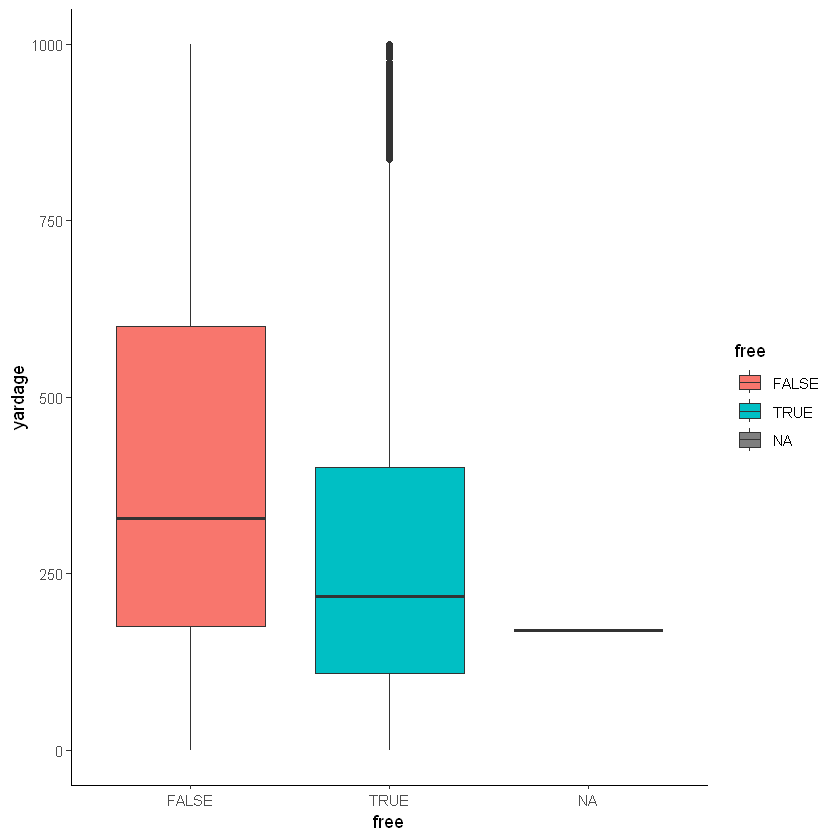

In [24]:
ggplot(data = pattern_df,aes(x = free,y = yardage,fill = free)) + geom_boxplot() +
  theme_classic() + ylim(0,1000)

Alright, there was a ton more outlier noise than even I expected so I added limits on y to 1000 yards. But yeah looking at this I can see that my hypothesis was correct, free patterns usually don't use as many yards of yarn as paid ones. Like this is actually super cool, I've been wondering about this for years.

#### Viz 3

As another visualization I'd want to take a look at the distribution of words used to describe patterns and also the words used in the names of the patterns themselves. I will do these both in python as there is more word cloud support in that language.



In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text_data = pd.read_csv("../data/patterns_data_text.csv")
name_data = pd.read_csv("../data/pattern_data_cleaned.csv")

text_data = text_data["notes"]
name_data = name_data["name"]

print(text_data.head())

def word_cloud_gen(my_text):
    def plot_cloud(word_cloud):
        plt.figure(figsize = (40, 30))
        plt.imshow(wordcloud)
        plt.axis("off")

    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        random_state = 1,
        background_color = 'salmon',
        colormap = 'Pastel1',
        collocations = False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()


0    > The Trifle Wrap is the first of 6\r\r\n> mys...
1    The Skulls and Cones Halloween Crochet Sweater...
2    **Use the code BOREALIS15 for 15% off the patt...
3    **Use "cozyfall23" at check-out and enjoy a sw...
4    Alex Scarf is a simple ribbed scarf that can b...
Name: notes, dtype: object


C:\Users\duckd\AppData\Local\Temp\ipykernel_9268\2079817723.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  name_data = pd.read_csv("../data/pattern_data_cleaned.csv")


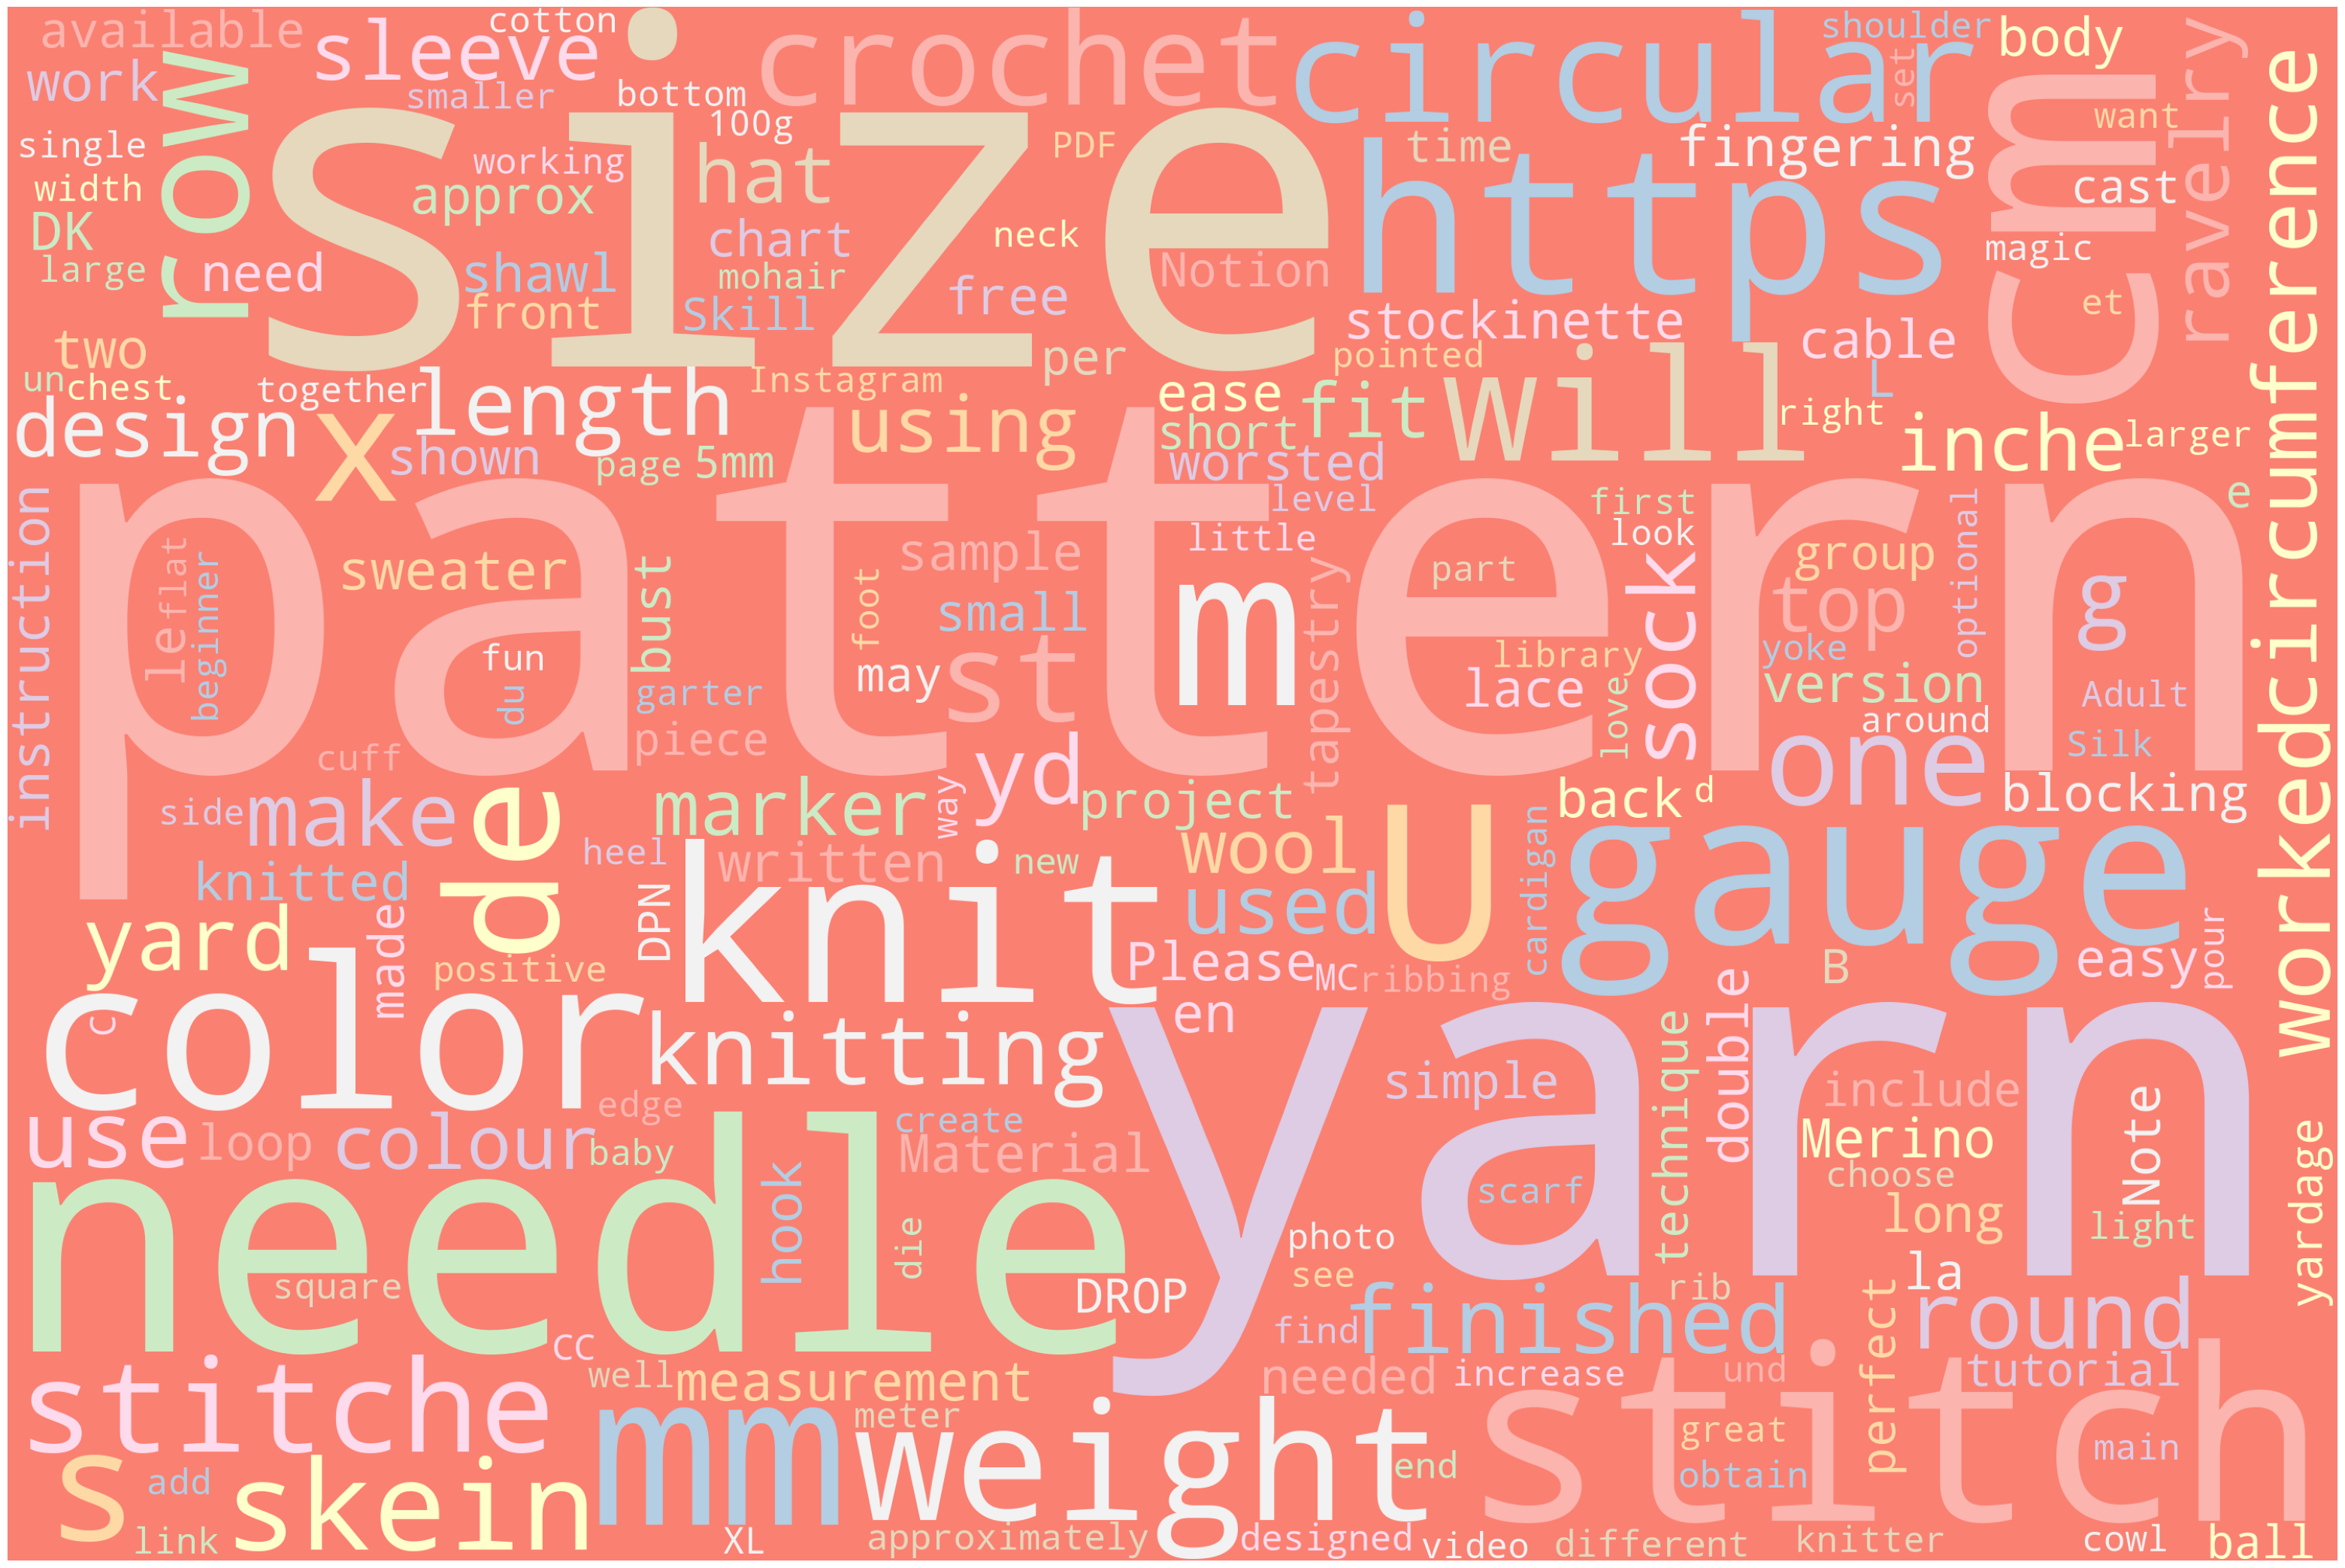

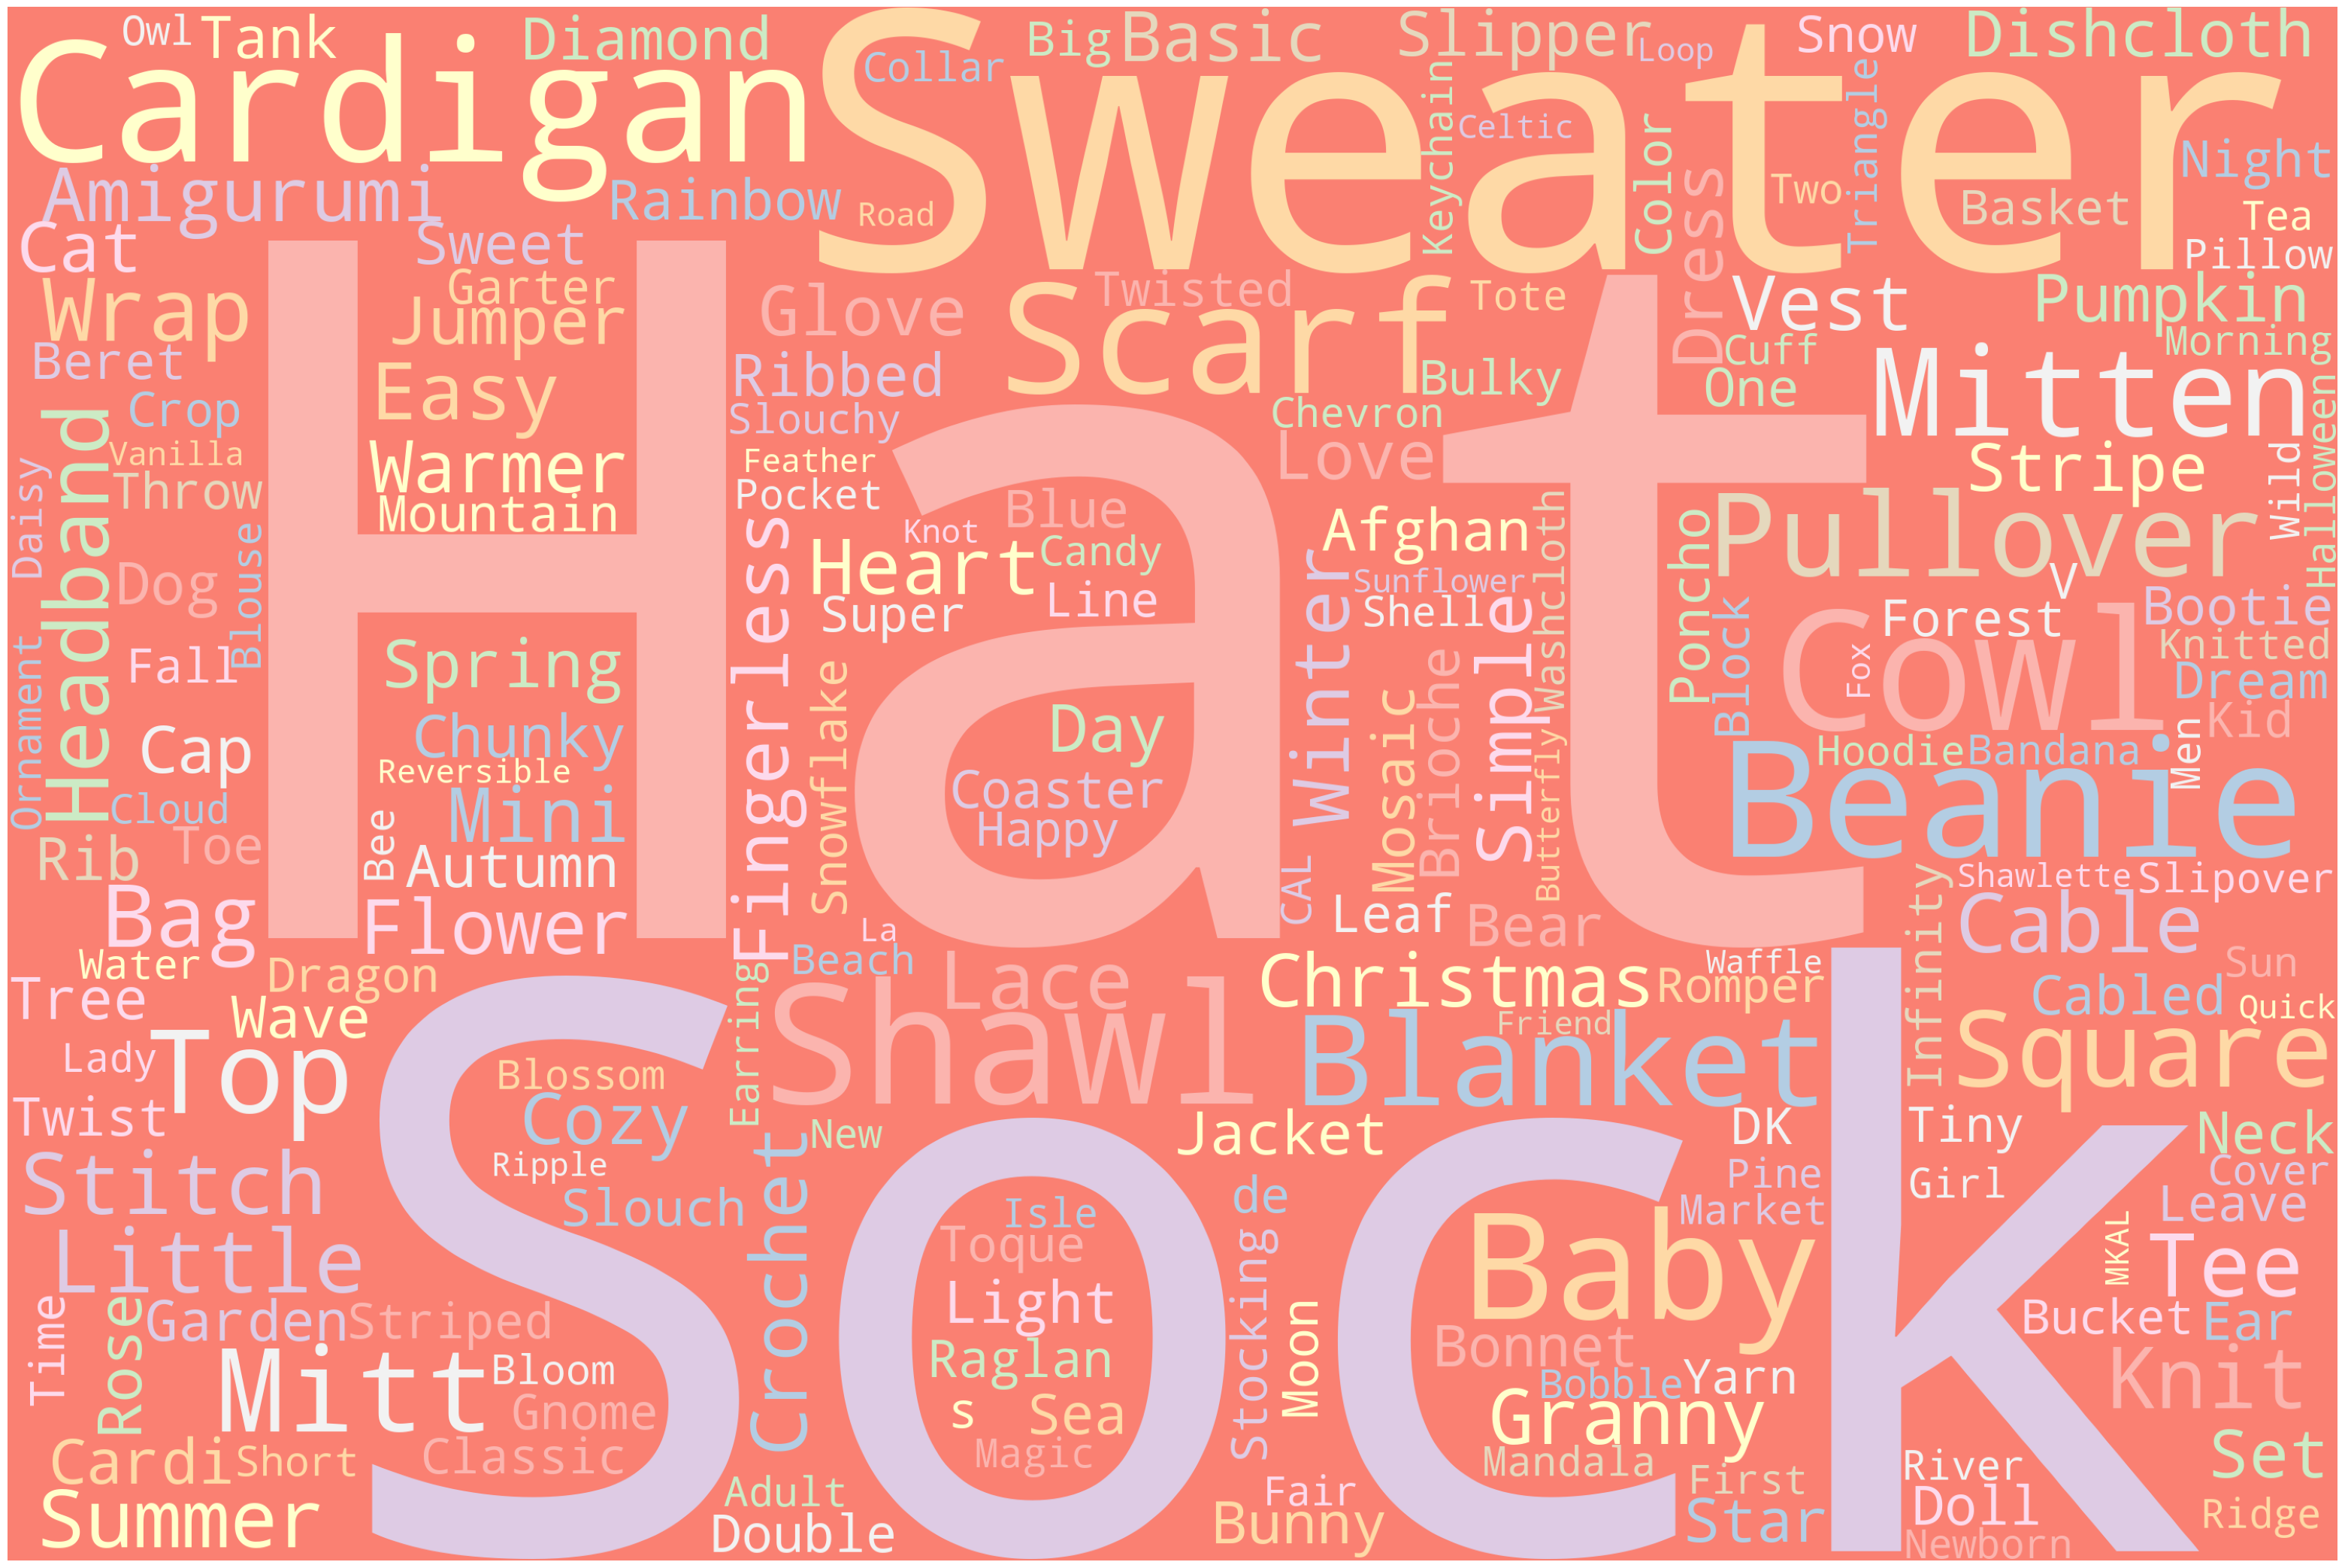

In [39]:
text_data = text_data.astype('string').dropna()
text_list = text_data.tolist()

word_cloud_gen(" ".join(text_list))
word_cloud_gen(" ".join(name_data))



I do like these two pictures of the words used for descriptions as I think they well represent the types of patterns and the facts about them, giving a top down view of the vocabulary of a knitter. The text itself is fairly expected with the descriptions having more technical words and shorthand while the names become representations of the types of patterns. It is interesting that hat and sock are the most common words while not being the most common pattern types in the data. This may be because other patterns with more general types do not need to include the name of what it is in the title. Very interesting.

I think I'm going to bring one of these two to be on my introduction slide as they work well to create the sense of what sorts of information we are working with.

## Conclusions

This is possibly my favorite data set I've ever used and there's alot to uncover here. Some relationships seem to be clear and as expected but others could show contradictory proof. There don't seem to be too many strong linear relationships so more advanced methods may very much be needed in order to figure out the underlying patterns in the data. There is some space for improvement around normalizing data for analysis but much of the data is not normally distributed. Outliers make up a lot of the data but some patterns are far more popular than others and the story of those outliers themselves seem very interesting. Either way, I now have a strong foundation of knowledge on the data and I look forward to finding more specifics through advanced models.
